
# Linear regression with multi variable

This Matlab code has been completed as part of [Machine Learning](https://www.coursera.org/learn/machine-learning)
course in Coursera given by Prof. Andrew Ng

------------
This part implements linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

This notebook includes:

- <a href='#norm'>Part 1: Feature Normalization</a>
- <a href='#gd'>Part 2: Gradient descent</a>
- <a href='#norm_equa'>Part 3: Normal Equations</a> 

In [1]:
clear all; close all; clc; warning off;
addpath('../data/') % add path to directory containing data files
addpath('./funcs/') % add path to directory containing subfunction files

## Part 1: Feature Normalization <a id='norm'></a>

The ex1 multi.m script will start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of mag-
nitude, first performing feature scaling can make gradient descent converge much more quickly.
Your task here is to complete the code in featureNormalize.m to
* Subtract the mean value of each feature from the dataset.
* After subtracting the mean, additionally scale (divide) the feature values by their respective "standard deviations."

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min).

In [2]:
data = load('data_02_LR_multiplevariable.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Print out some data points
fprintf('First 10 examples from the dataset: \n');
fprintf(' x = [%.0f %.0f], y = %.0f \n', [X(1:10,:) y(1:10,:)]');


% Scale features and set them to zero mean
mu=mean(X,1); % mean
sigma=std(X,1); % std
X_norm=(X-repmat(mu,size(X,1),1))./repmat(sigma,size(X,1),1); % nomarlize to zero-mean and std of 1

% Add intercept term to X
X_norm = [ones(m, 1) X_norm];

First 10 examples from the dataset: 
 x = [2104 3], y = 399900 
 x = [1600 3], y = 329900 
 x = [2400 3], y = 369000 
 x = [1416 2], y = 232000 
 x = [3000 4], y = 539900 
 x = [1985 4], y = 299900 
 x = [1534 3], y = 314900 
 x = [1427 3], y = 198999 
 x = [1380 3], y = 212000 
 x = [1494 3], y = 242500

## Part 2: Gradient descent <a id='gd'></a>
The hypothesis function and the batch gradient descent update rule remain unchanged compared to the single variable case, except that now one works with more features.

In the multivariate case, the cost function can also be written in the following vectorized form:
    $$J(\theta)=\frac{1}{2m}\left(X\theta-y\right)^T\left(X\theta-y\right)$$
where $ X=
\begin{bmatrix}
    - & \left(x^{(1)}\right)^T &- \\
    - & \left(x^{(2)}\right)^T & - \\
      & ... &  \\
    - & \left(x^{(m)}\right)^T & -
\end{bmatrix} $
and 
$y=
\begin{bmatrix}
    - & y^{(1)} &- \\
    - & y^{(2)} & - \\
      & ... &  \\
    - & y^{(m)} & -
\end{bmatrix} $

The derivative of above cost function is: $$\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}X^T\left(X\theta-y\right)$$

The batch Gradient Descent finds the optimal $\theta$ that minimizes the cost function $J(\theta)$ by iterating the following update rule: $$\theta:=\theta-\frac{\alpha}{m}X^T\left(X\theta-y\right)$$

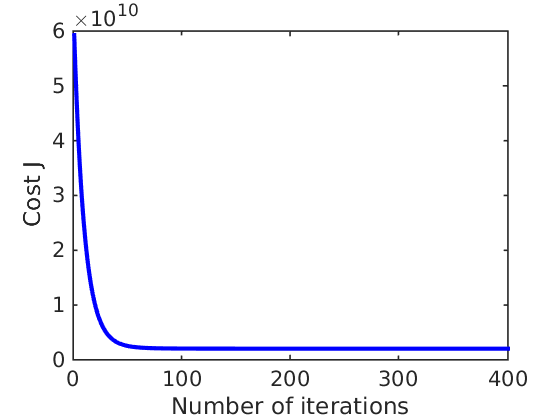

Theta computed from gradient descent: 
 340412.659156 
 109439.875533 
 -6570.433918 

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $293083.206131

In [3]:
% Choose some alpha value
alpha = 0.05;
num_iters = 400;


computeCostMulti=@(X, y, theta)1/(2*size(X,1))*(X*theta-y)'*(X*theta-y);

% Init Theta and Run Gradient Descent 
theta = zeros(3, 1);
J_history = zeros(num_iters, 1);
for iter = 1:num_iters
    theta=theta-alpha/m*X_norm'*(X_norm*theta-y);
    J_history(iter) = computeCostMulti(X_norm, y, theta);
end
    
% Plot the convergence graph
figure;
plot(1:numel(J_history), J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');

% Display gradient descent's result
fprintf('Theta computed from gradient descent: \n');
fprintf(' %f \n', theta);
fprintf('\n');

% Estimate the price of a 1650 sq-ft, 3 br house
% Recall that the first column of X is all-ones. Thus, it does not need to be normalized.
X_pred=[1,1650,3];
X_pred(2:end)=(X_pred(2:end)-mu)./sigma;
price = X_pred*theta;

fprintf(['Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n $%f\n'], price);

The learning rate $\alpha$ will decide how fast the learning converges to the local minimum. Too large $\alpha$ however leads to "over-shooting", which leads to the divergence of the algorithm.

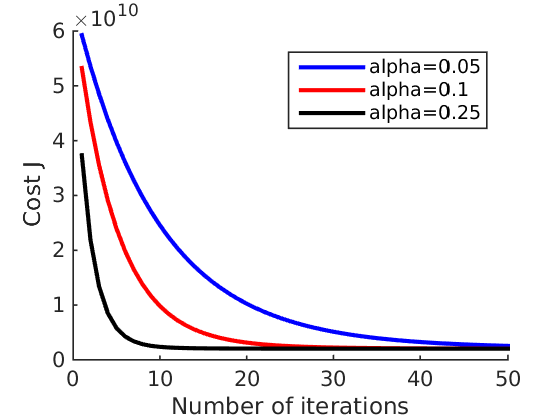

In [4]:
% Choose some alpha value
alphas = [0.05,0.1,0.25];
num_iters = 50;

J_history_all=zeros(numel(alphas),num_iters);
for i=1:numel(alphas)
    alpha=alphas(i);
    
    % gradient descent step
    theta = zeros(3, 1);
    J_history = zeros(num_iters, 1);
    for iter = 1:num_iters
        theta = theta-alpha/m*X_norm'*(X_norm*theta-y);
        J_history_all(i,iter) = computeCostMulti(X_norm, y, theta);
    end
end

figure;
hold on
plot(1:num_iters, J_history_all(1,:), '-b', 'LineWidth', 2);
plot(1:num_iters, J_history_all(2,:), '-r', 'LineWidth', 2);
plot(1:num_iters, J_history_all(3,:), '-k', 'LineWidth', 2);
hold off
legend('alpha=0.05','alpha=0.1','alpha=0.25')
xlabel('Number of iterations');
ylabel('Cost J');

## Part 3: Normal Equations  <a id='norm_equa'></a>

The closed-form solution to linear regression is $$\theta =  \left( X^TX \right)^{-1}X^Ty$$

Using this formula does not require any feature scaling, and one gets an exact solution in one calculation: there is no "loop until convergence" like in gradient descent.

In [5]:
% Calculate the parameters from the normal equation
theta=(X_norm'*X_norm)\X_norm'*y;
% Display normal equation's result
fprintf('Theta computed from the normal equations: \n');
fprintf(' %f \n', theta);
fprintf('\n');

% Estimate the price of a 1650 sq-ft, 3 br house
X_pred=[1,1650,3];
price = X_pred*theta; % You should change this

fprintf(['Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n $%f\n'], price);

Theta computed from the normal equations: 
 340412.659574 
 109447.796470 
 -6578.354854 

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $180909541.769921